In [101]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import cv2
from glob import glob

## **READING IMAGES**

In [102]:
img_mpl = plt.imread('winner.jpg')
img_cv2 = cv2.imread('winner.jpg')
img_cv2.shape, img_mpl.shape

((900, 900, 3), (900, 900, 3))

<AxesSubplot:title={'center':'Distribution of Pixel values'}, ylabel='Frequency'>

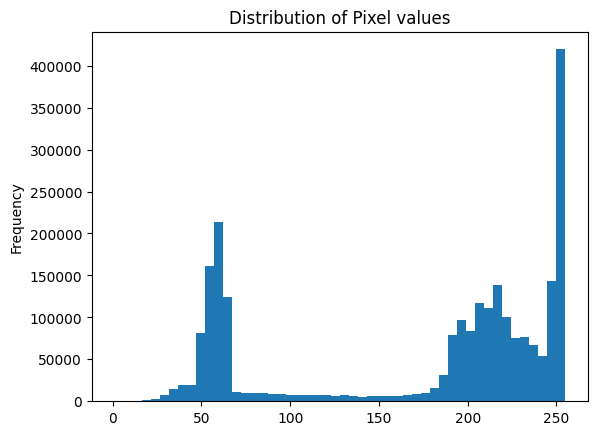

In [15]:
pd.Series(img_mpl.flatten()).plot(kind='hist', 
                                  bins=50,
                                  title='Distribution of Pixel values')

## DISPLAY IMAGES

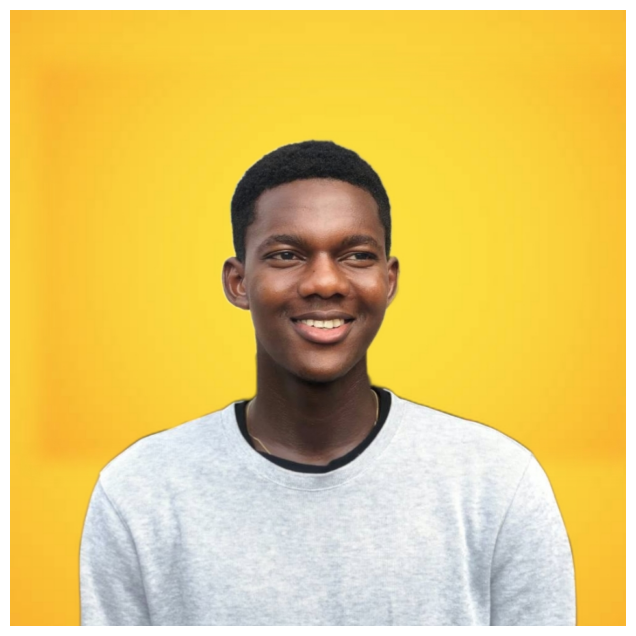

In [103]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_mpl)
plt.axis('off')
plt.show()

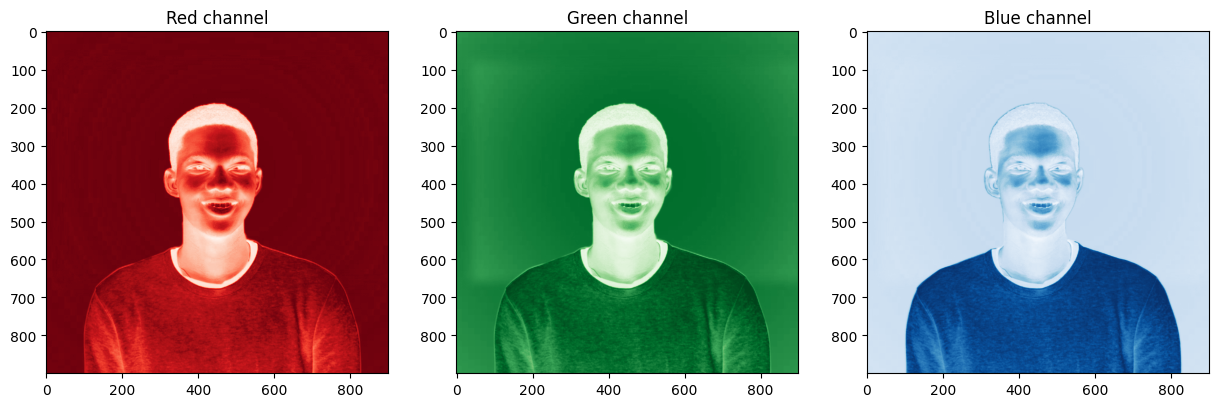

In [104]:
fig, ax = plt.subplots(1,3, figsize=(15, 5))
ax[0].imshow(img_mpl[:,:,0], cmap='Reds')
ax[1].imshow(img_mpl[:,:,1], cmap='Greens')
ax[2].imshow(img_mpl[:,:,2], cmap='Blues')
ax[0].set_title('Red channel')
ax[1].set_title('Green channel')
ax[2].set_title('Blue channel')
plt.show()

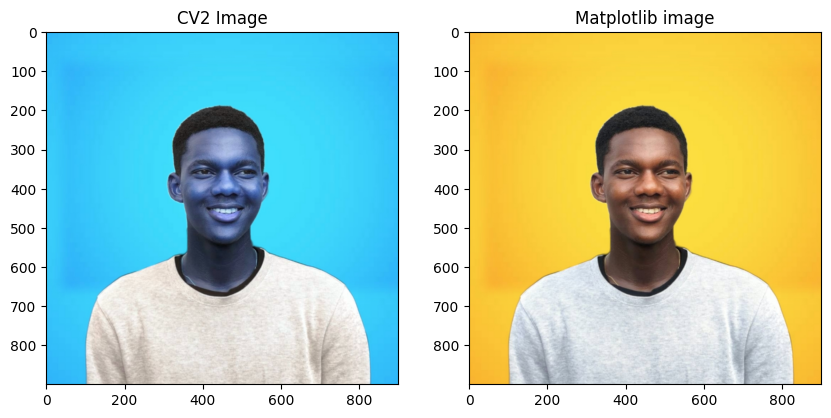

In [42]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
ax[0].imshow(img_cv2)
ax[1].imshow(img_mpl)
ax[0].set_title('CV2 Image')
ax[1].set_title('Matplotlib image')
plt.show()

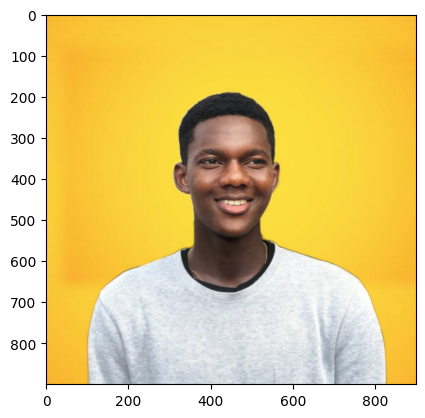

In [105]:
# Converting from BGR to RGB

img_cv2_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)

plt.imshow(img_cv2_rgb);

## **IMAGE MANIPULATION**

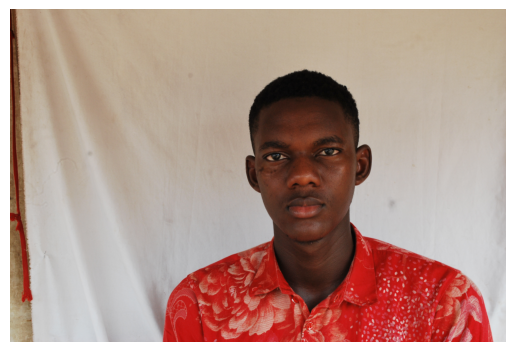

In [106]:
img2 = plt.imread('PASSPORT.JPG')
img2_cv = cv2.imread('PASSPORT.JPG')
plt.imshow(img2)
plt.axis('off')
plt.show()

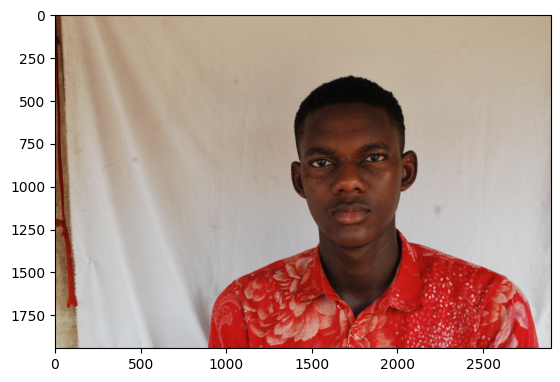

In [60]:
img2_cv = cv2.cvtColor(img2_cv, cv2.COLOR_BGR2RGB)
plt.imshow(img2_cv)

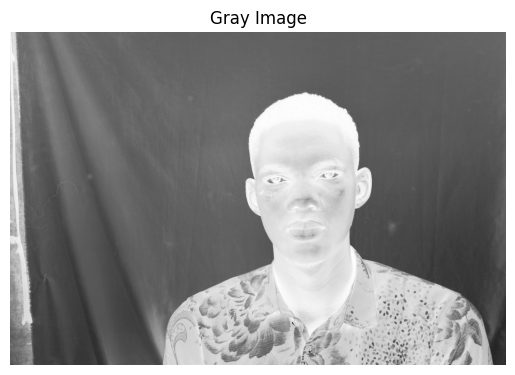

In [111]:
img_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap='Greys')
plt.axis('off')
plt.title('Gray Image')
plt.show()


## RESIZING AND RESCALING

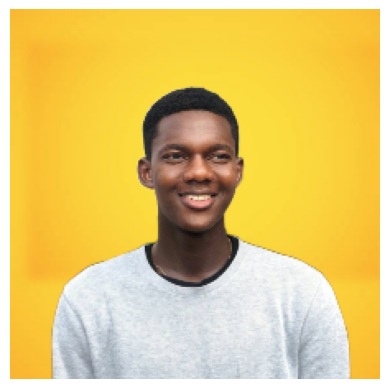

In [112]:
img_resize = cv2.resize(img_mpl, None, fx=0.25, fy=0.25)
plt.imshow(img_resize)
plt.axis('off')
plt.show()

In [113]:
img_resize.shape

(225, 225, 3)

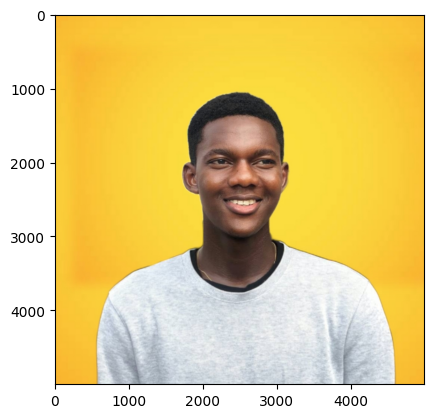

In [114]:
img_resize = cv2.resize(img_mpl, (5000, 5000), interpolation=cv2.INTER_CUBIC)
plt.imshow(img_resize)
plt.show()

# **CROPPING IMAGES**

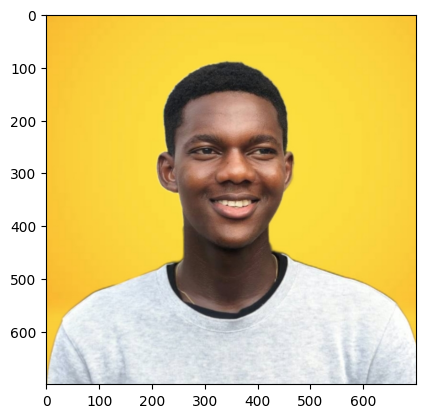

In [124]:
plt.imshow(img_cv2_rgb[100:800, 100:800])

IDENTITY - [[ 0 0 0 ]
            [ 0 1 0 ]
           [ 0 0 0 ]]

EDGE DETECTION - [[1 0 -1] [0 0 0] [-1 0 1]], [[0 -1 0] [-1 4 -1] [0 -1 0]], [[-1 -1 -1] [-1 8 -1] [-1 -1 -1]]

SHARPEN - [[ 0 -1 0 ]
            [ -1 5 -1]
           [ 0 -1 0 ]]

# sharpen

(-0.5, 899.5, 899.5, -0.5)

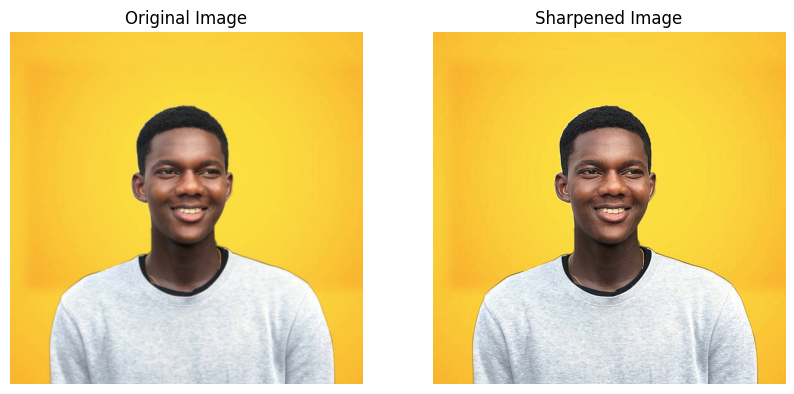

In [125]:
kernel_sharpen = np.array([[ 0, -1, 0 ],
                           [ -1, 5, -1],
                           [ 0, -1, 0 ]])

sharp_image = cv2.filter2D(img_mpl, -1, kernel_sharpen)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_mpl)
ax[1].imshow(sharp_image)
ax[0].set_title('Original Image')
ax[1].set_title('Sharpened Image')
ax[0].axis('off')
ax[1].axis('off')

(-0.5, 899.5, 899.5, -0.5)

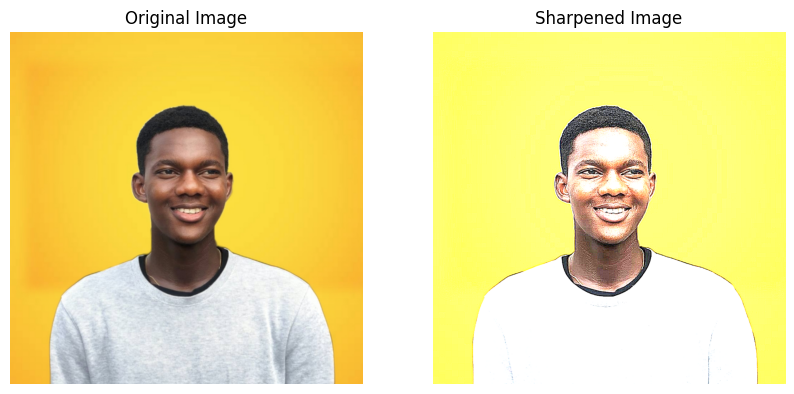

In [154]:
kernel_sharpen = np.array([[ -1, -1, -1 ],
                           [ -1, 9, -1],
                           [ -1, -1, -1 ]])*2

sharp_image = cv2.filter2D(img_mpl, -1, kernel_sharpen)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_mpl)
ax[1].imshow(sharp_image)
ax[0].set_title('Original Image')
ax[1].set_title('Sharpened Image')
ax[0].axis('off')
ax[1].axis('off')

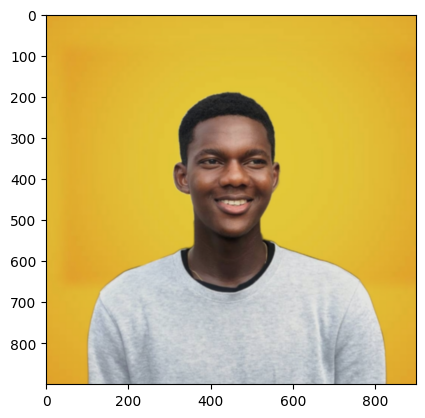

In [153]:
# Brightness image

kernel_bright = np.ones((3,3), np.float32)/10

bright_image = cv2.filter2D(img_mpl, -1, kernel_bright)
plt.imshow(bright_image)

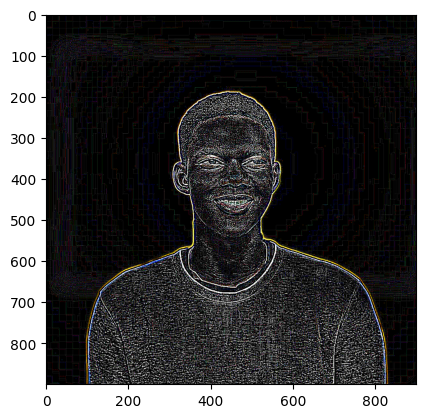

In [ ]:
kernel_kk = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])*8

negative_image = cv2.filter2D(img_mpl, -1, kernel_kk)
plt.imshow(negative_image)

In [1]:
import requests

In [2]:
response = requests.post(
    'https://api.remove.bg/v1.0/removebg',
    files={'image_file': open('winner.jpg', 'rb')},
    data={'size': 'auto'},
    headers={'X-Api-Key': 'INSERT_YOUR_API_KEY_HERE'},
)
if response.status_code == requests.codes.ok:
    with open('no-bg.png', 'wb') as out:
        out.write(response.content)
else:
    print("Error:", response.status_code, response.text)

Error: 403 {"errors":[{"title":"API Key invalid","code":"auth_failed"}]}


In [3]:
file_path = input("Please insert the path to the image: ")

response = requests.post(
    'https://api.remove.bg/v1.0/removebg',
    files={'winner.jpg': open(f'{file_path}', 'rb')},
    data={'size': 'auto'},
    headers={'X-Api-Key': 'INSERT_YOUR_API_KEY_HERE'},
)
if response.status_code == requests.codes.ok:
    with open('no-bg.png', 'wb') as out:
        out.write(response.content)
else:
    print("Error:", response.status_code, response.text)

Error: 403 {"errors":[{"title":"API Key invalid","code":"auth_failed"}]}
